<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Simple_linear_regression_horsepower_and_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercise: Simple Linear Regression**

Dataset: mpg

1. Analize data
    - feature: horsepower
    - target: mpg
2. Apply linear regression
3. Interpret f-test and t-test
4. Interpret the result

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# Data dimension
df.shape

(398, 9)

In [4]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# Statistical descriptive
display(df.describe(), df.describe(include='object').T)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


,count,unique,top,freq
origin,398,3,usa,249
name,398,305,ford pinto,6


In [6]:
# calculating number of missing values in each column
df.isna().sum().to_frame(name='missing_value')

,missing_value
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [7]:
# Calculating percentage of missing values
(df.isna().sum()/df.shape[0]).to_frame(name='missing_value_percentage')*100

,missing_value_percentage
mpg,0.000000
cylinders,0.000000
displacement,0.000000
horsepower,1.507538
weight,0.000000
acceleration,0.000000
model_year,0.000000
origin,0.000000
name,0.000000


In [8]:
# Displaying rows with missing values
df[df['horsepower'].isna() == True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [9]:
# Normality test
# Checking normal distribution with normal test (D'Agustino)

# Selecting numerical variables
numerical = [var for var in df.columns if df[var].dtypes in ['int64', 'float64']]

# Importing library
from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df[feature_name])

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,mpg,20.555425,3.439111e-05,Not Normally Distributed
1,cylinders,1680.611269,0.000000e+00,Not Normally Distributed
2,displacement,53.269638,2.707978e-12,Not Normally Distributed
3,horsepower,NaN,NaN,Not Normally Distributed
4,weight,46.086181,9.829083e-11,Not Normally Distributed
5,acceleration,7.627952,2.206029e-02,Not Normally Distributed
6,model_year,208.752174,4.677798e-46,Not Normally Distributed


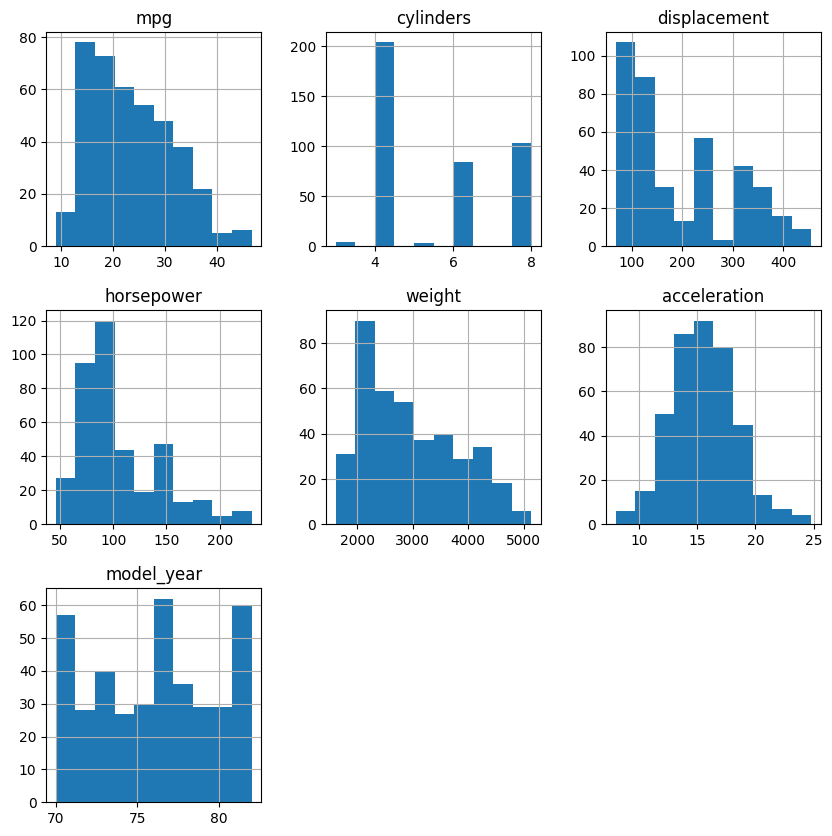

In [10]:
# Histogram # Data distribution
df.hist(figsize=(10,10))
plt.show()

In [11]:
# Handling missing values with simple imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['horsepower'] = imputer.fit_transform(df[['horsepower']])

In [12]:
# Calculating number of missing values in each column # Sanity check
df.isna().sum().to_frame(name='missing_value')

,missing_value
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


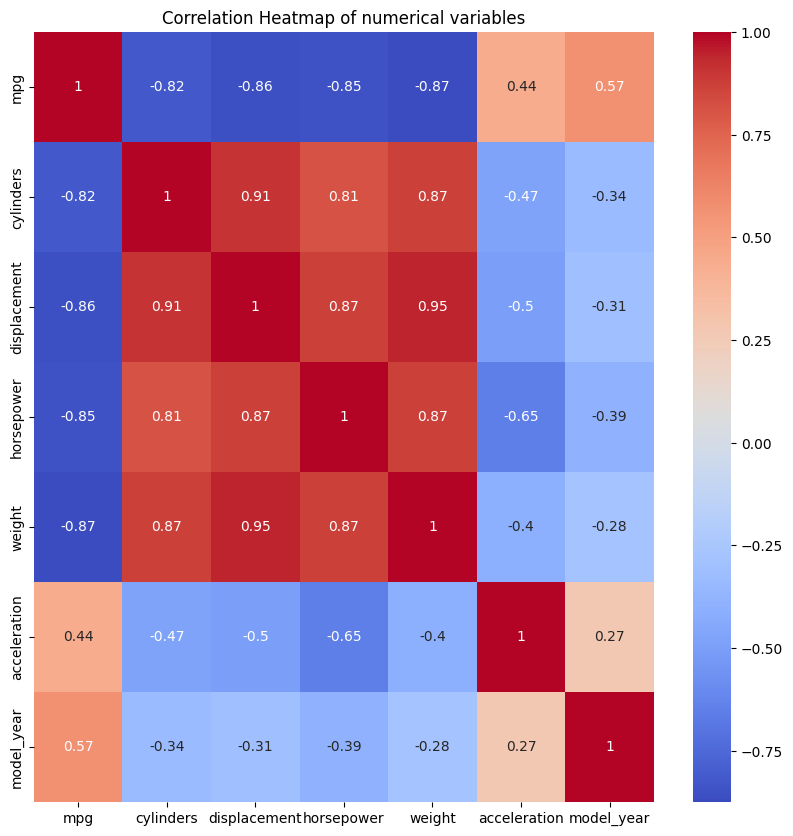

In [13]:
# Heatmap Correlation

# Selecting numerical variables
numerical = [var for var in df.columns if df[var].dtypes in ['int64', 'float64']]

# Figure size
plt.figure(figsize=(10,10))

# Heatmap
sns.heatmap(df[numerical].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of numerical variables')
plt.show()

In [14]:
# We want to check the relationship between a feature and target
# descriptive statistic
df[['mpg', 'horsepower']].describe()

,mpg,horsepower
count,398.000000,398.000000
mean,23.514573,104.304020
std,7.815984,38.222625
min,9.000000,46.000000
25%,17.500000,76.000000
50%,23.000000,93.500000
75%,29.000000,125.000000
max,46.600000,230.000000


In [15]:
# Correlation test using spearman
df[['horsepower', 'mpg']].corr(method='spearman') # Strong negative correlation

,horsepower,mpg
horsepower,1.000000,-0.847975
mpg,-0.847975,1.000000


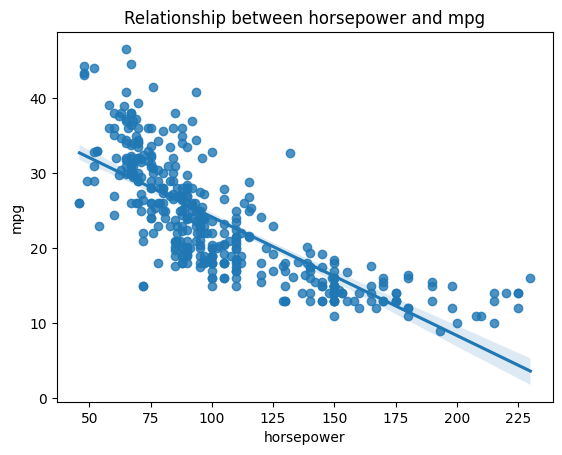

In [16]:
# regplot trendline
sns.regplot(data=df, y='mpg', x='horsepower')
plt.title('Relationship between horsepower and mpg')
plt.show()

We start to apply simple linear regression to the dataset:

y: mpg
X: horsepower

In [17]:
# Defining target and feature
y = df['mpg']                                 # 'MPG' as target # in series
X = sm.add_constant(df[['horsepower']])       # 'horsepower' as feature # Usually in matrix form

In [18]:
X

,const,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0
...,...,...
393,1.0,86.0
394,1.0,52.0
395,1.0,84.0
396,1.0,79.0


In [19]:
# Defining Linear regression model
linreg = sm.OLS(y, X) # OLS: Ordinary least square # rumus linreg jadi estimator

# Fitting model
result = linreg.fit()

In [20]:
# Result summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     589.6
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           2.00e-80
Time:                        04:34:55   Log-Likelihood:                -1201.1
No. Observations:                 398   AIC:                             2406.
Df Residuals:                     396   BIC:                             2414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0113      0.723     55.307      0.0

# **Model Interpretation**

### **Equation:**  
$$\text{y} = \beta_{0} + \beta_{1} * \text{X}$$  
$$\text{mpg} = 40.013 - 0.1582 * \text{horsepower}$$  

### **F-Test:**  
- 'Ho': $\beta_{1}=0$. Horsepower does not have a significant effect on mpg.  
- 'H1': $\beta_{1}!=0$. Horsepower has a significant effect on mpg. (At least one variable significantly affects the target)  
- $\alpha = 0.05$  
- Prob(F-statistic) or p-value: 2.00e-80  
- p-value < 0.05 → Reject 'H0'  
- This means we have sufficient evidence that **horsepower significantly affects mpg**.  

### **Partial Test:**  

- **$\beta_{0}$: const (intercept)**  
  - 'Ho': $\beta_{0}=0$. The model does not require an intercept.  
  - 'H1': $\beta_{0}!=0$. The model requires an intercept.  
  - $\alpha = 0.05$  
  - P>|t|: p-value = 0.000  
  - p-value < 0.05 → Reject 'H0'  
  - This means we have sufficient evidence that **the model requires an intercept**.  

- **$\beta_{1}$: horsepower (slope)**  
  - 'Ho': $\beta_{1}=0$. Horsepower does not have a significant effect on mpg.  
  - 'H1': $\beta_{1}!=0$. Horsepower has a significant effect on mpg.  
  - $\alpha = 0.05$  
  - P>|t|: p-value = 0.000  
  - p-value < 0.05 → Reject 'H0'  
  - This means we have sufficient evidence that **horsepower significantly affects mpg**.  

### **Parameter Estimate:**  
- $\beta_{0} = 40.0113$. This means that mpg is 40.0113 when horsepower is 0. (This case is invalid because $x=0$ is outside the horsepower range of 46 to 230 hp. However, we can conclude that the model requires an intercept.)  
- $\beta_{1} = -0.1582$. This means that for every 1-unit increase in horsepower, mpg decreases by 0.1582. This interpretation is only valid for horsepower values within the range of 46 to 230 hp.  

### **Coefficient of Determination:**  
- **R-squared: 0.598**  
- This model (which only uses the **horsepower** feature) can explain **59.8%** of the variation in **mpg**. The remaining **40.2%** can be explained by other features not included in the model.  


In [21]:
# Predict
y_pred = result.predict(X)

df_result = pd.DataFrame({
    'y_actual': y,
    'y_predict': y_pred
})

df_result.head()

,y_actual,y_predict
0,18.0,19.450491
1,15.0,13.914884
2,18.0,16.287287
3,16.0,16.287287
4,17.0,17.868889


In [22]:
# Calculating residual
df_result['residual'] = df_result['y_actual'] - df_result['y_predict']
df_result.head()

,y_actual,y_predict,residual
0,18.0,19.450491,-1.450491
1,15.0,13.914884,1.085116
2,18.0,16.287287,1.712713
3,16.0,16.287287,-0.287287
4,17.0,17.868889,-0.868889


In [23]:
# Calculating squarred error
df_result['Squared_error'] = df_result['residual'] ** 2
df_result.head()

,y_actual,y_predict,residual,Squared_error
0,18.0,19.450491,-1.450491,2.103925
1,15.0,13.914884,1.085116,1.177476
2,18.0,16.287287,1.712713,2.933384
3,16.0,16.287287,-0.287287,0.082534
4,17.0,17.868889,-0.868889,0.754969


In [24]:
# sum square error
SSE = df_result['Squared_error'].sum()
SSE

np.float64(9743.960653007689)

In [25]:
# mean square error
MSE = SSE/len(df_result)
MSE

np.float64(24.482313198511783)

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_pred)

24.482313198511783

In [27]:
# Calculating RMSE
RMSE = np.sqrt(MSE)
RMSE

np.float64(4.947960508988706)

In [28]:
# Predict to New Data

result.predict([1,50]) # 1 is as constant value

array([32.10330771])

In [29]:
# Predict to New Data

result.predict([1,230]) # 1 is a constant value

array([3.63447115])

**Conclusion**

As the horsepower increases, the miles per gallon (mpg) decreases, indicating that higher horsepower engines consume more fuel and are less fuel-efficient.